In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load data

heart_data_raw = pd.read_excel("heart.xlsx")

In [3]:
#Validate missing values 

heart_data_raw[["age","sex","cp","trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal","target"]].isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [44]:
#Clean ups

heart_data = heart_data_raw.copy()

#Clean up by definition
heart_data['sex'] = ['Male' if x == 1 else 'Female' for x in heart_data['sex']]
heart_data['cp'] = ['Typical Angine' if x == 0 else 'Atypical angina' if x == 1 else 'Non-anginal pain' if x==2 else 'Asymptomatic' for x in heart_data['cp']]
heart_data['fbs'] = ['True' if x == 1 else 'False' for x in heart_data['fbs']]
heart_data['restecg'] = ['Normal' if x == 0 else 'STT wave abnormality' if x ==1 else 'Hypertrophy' for x in heart_data['restecg']]
heart_data['exang'] = ['Yes' if x == 1 else 'No' for x in heart_data['exang']]
heart_data['slope'] = ['Unsloping' if x == 1 else 'Flat' if x == 2 else 'Downsloping' for x in heart_data['slope']]
heart_data['thal'] = ['Normal' if x == 3 else 'Fixed defect' if x == 6 else 'reversable defect' for x in heart_data['thal']]
heart_data['target'] = ['No' if x == 0 else 'Yes' for x in heart_data['target']]

#Additional grouping
heart_data['ageGroup'] = ['Youth' if age < 19 else 'Senior' if age > 60 else 'Adult' for age in heart_data['age']]
heart_data['OldPeak2'] = ['Lower' if x < 0.8 else 'Higher' for x in heart_data['oldpeak']]

#Additional grouping from research
#assuming resting blood pressure is diastolic blood pressure. based on https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers#1-3
heart_data['RestBloodPressure'] = ['High' if x < 120 else 'Hypertensive Crisis' for x in heart_data['trestbps']]
heart_data['Cholestoral'] = ['Normal' if x < 130 else 'High' for x in heart_data['chol']]
def calc_maxHeartRate (num):
    age, maxrate = num
    return 'Normal' if maxrate <= 220 -age else 'High'
heart_data['MaxHeartRate'] = heart_data[['age', 'thalach']].apply(calc_maxHeartRate, axis= 1)

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ageGroup,OldPeak2,RestBloodPressure,Cholestoral,MaxHeartRate
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Downsloping,0,reversable defect,Yes,Senior,Higher,Hypertensive Crisis,High,Normal
1,37,Male,Non-anginal pain,130,250,False,STT wave abnormality,187,No,3.5,Downsloping,0,reversable defect,Yes,Adult,Higher,Hypertensive Crisis,High,High
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Flat,0,reversable defect,Yes,Adult,Higher,Hypertensive Crisis,High,Normal
3,56,Male,Atypical angina,120,236,False,STT wave abnormality,178,No,0.8,Flat,0,reversable defect,Yes,Adult,Higher,Hypertensive Crisis,High,High
4,57,Female,Typical Angine,120,354,False,STT wave abnormality,163,Yes,0.6,Flat,0,reversable defect,Yes,Adult,Lower,Hypertensive Crisis,High,Normal


In [67]:
#Statistics of original data

heart_data_raw.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [62]:
heart_data_raw.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003C5A73D1D0>,
      dtype=object)

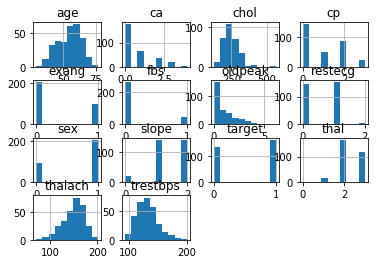

In [56]:
heart_data_raw.hist()

In [32]:
heart_data_clean = heart_data.copy()

#heart_data_clean.columns = ['Age', 'Sex', 'Chest_Pain_Type', 'Diastolic_Blood_Pressure', 'Cholestoral', 'Fasting_Blood_Sugar_greater_120','Rest_Electrocardiographic_Result','Max_Heart_Rate','Exercise_Induced_Angina','ST_Depression','Slope','Num_Major_Vessels', 'Thalassemia', 'Target', 'AgeGroup']
#heart_data_cleaned.columns = ['Age', 'Sex', 'Chest Pain Type', 'Rest Blood Pressure', 'Cholestoral', 'Fasting Blood Sugar > 120','Resting Electrocardiographic Result','Max Heart Rate','Exercise Induced Angina','ST Depression','Slope','Numer of Major Vessels', 'Thalassemia', 'Target' ]

#heart_data_clean.head()

In [71]:
#Statistics of data based on person with heart disease and not

heart_data_grouped = heart_data_raw.groupby('target')
heart_data_grouped.median()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [75]:
heart_data_grouped.corr()

age       sex        cp  trestbps      chol       fbs  \
target                                                                        
0      age       1.000000 -0.141135  0.045846  0.240272  0.112610  0.069288   
       sex      -0.141135  1.000000  0.158391 -0.288312 -0.222281 -0.113533   
       cp        0.045846  0.158391  1.000000  0.058374 -0.043784 -0.011442   
       trestbps  0.240272 -0.288312  0.058374  1.000000  0.135336  0.213452   
       chol      0.112610 -0.222281 -0.043784  0.135336  1.000000  0.046234   
       fbs       0.069288 -0.113533 -0.011442  0.213452  0.046234  1.000000   
       restecg  -0.095330 -0.078597  0.049831 -0.089782 -0.062818 -0.105849   
       thalach  -0.132751 -0.067555  0.218666  0.005595  0.045005  0.034082   
       exang    -0.050885 -0.030079 -0.392959  0.041147  0.075505  0.074977   
       oldpeak   0.103004 -0.090716 -0.072766  0.128450 -0.009356 -0.008879   
       slope    -0.084654  0.170914  0.086124 -0.152855  0.003418 -0.094383   
       ca        0.326097 -0.055165 -0.131269  0.047370  0.114714  0.177705   
       thal     -0.100555  0.029239 -0.069065  0.032502  0.071232 -0.143806   
1      age       1.000000 -0.190231  0.024934  0.274698  0.257154  0.155415   
       sex      -0.190231  1.000000  0.039321  0.030943 -0.239287  0.142416   
       cp        0.024934  0.039321  1.000000  0.185422 -0.044993  0.227776   
       trestbps  0.274698  0.030943  0.185422  1.000000  0.093291  0.136800   
       chol      0.257154 -0.239287 -0.044993  0.093291  1.000000 -0.017795   
       fbs       0.155415  0.142416  0.227776  0.136800 -0.017795  1.000000   
       restecg  -0.084360  0.018542 -0.073879 -0.102860 -0.206730 -0.057736   
       thalach  -0.525801  0.204315  0.064143  0.028039  0.014455 -0.028132   
       exang     0.046990  0.071849 -0.104002 -0.045556 -0.011896 -0.060931   
       oldpeak   0.174594  0.032630  0.207949  0.181501  0.057718 -0.004714   
       slope    -0.109380  0.015768 -0.127548 -0.008066  0.044581 -0.019531   
       ca        0.117463  0.060384  0.101492  0.051005 -0.029081  0.095860   
       thal      0.080959  0.229687  0.047912 -0.013813  0.081992  0.083362   

                  restecg   thalach     exang   oldpeak     slope        ca  \
target                                                                        
0      age      -0.095330 -0.132751 -0.050885  0.103004 -0.084654  0.326097   
       sex      -0.078597 -0.067555 -0.030079 -0.090716  0.170914 -0.055165   
       cp        0.049831  0.218666 -0.392959 -0.072766  0.086124 -0.131269   
       trestbps -0.089782  0.005595  0.041147  0.128450 -0.152855  0.047370   
       chol     -0.062818  0.045005  0.075505 -0.009356  0.003418  0.114714   
       fbs      -0.105849  0.034082  0.074977 -0.008879 -0.094383  0.177705   
       restecg   1.000000 -0.059244  0.050105  0.059092 -0.056051 -0.159378   
       thalach  -0.059244  1.000000 -0.286425 -0.213269  0.350811 -0.070060   
       exang     0.050105 -0.286425  1.000000  0.168676 -0.199696 -0.065389   
       oldpeak   0.059092 -0.213269  0.168676  1.000000 -0.563678  0.148117   
       slope    -0.056051  0.350811 -0.199696 -0.563678  1.000000  0.014539   
       ca       -0.159378 -0.070060 -0.065389  0.148117  0.014539  1.000000   
       thal     -0.013699  0.069523  0.057557  0.097444  0.028485 -0.035755   
1      age      -0.084360 -0.525801  0.046990  0.174594 -0.109380  0.117463   
       sex       0.018542  0.204315  0.071849  0.032630  0.015768  0.060384   
       cp       -0.073879  0.064143 -0.104002  0.207949 -0.127548  0.101492   
       trestbps -0.102860  0.028039 -0.045556  0.181501 -0.008066  0.051005   
       chol     -0.206730  0.014455 -0.011896  0.057718  0.044581 -0.029081   
       fbs      -0.057736 -0.028132 -0.060931 -0.004714 -0.019531  0.095860   
       restecg   1.000000  0.031035 -0.092503 -0.087215  0.138237  0.133233   
       thalach   0.031035  1.000000 -0.173675 -0.182040  0.223528 -0.04

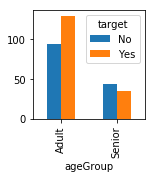

In [49]:
heart_data_subset = heart_data[['target','ageGroup', 'chol']].groupby(['target', 'ageGroup'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(2,2))
plt.show();

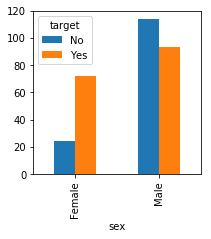

In [50]:
heart_data_subset = heart_data[['target','sex', 'chol']].groupby(['target', 'sex'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True,  figsize=(3,3))
plt.show();

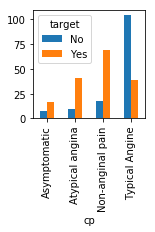

target,No,Yes
cp,,
Asymptomatic,7,16
Atypical angina,9,41
Non-anginal pain,18,69
Typical Angine,104,39


In [51]:
heart_data_subset = heart_data[['target','cp', 'chol']].groupby(['target', 'cp'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(2,2))
plt.show();

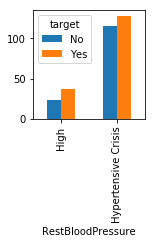

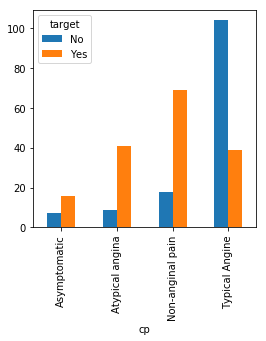

target,No,Yes
cp,,
Asymptomatic,7,16
Atypical angina,9,41
Non-anginal pain,18,69
Typical Angine,104,39


In [24]:
heart_data_subset = heart_data[['target', 'cp', 'chol']].groupby(['target', 'cp'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();
heart_data_subset

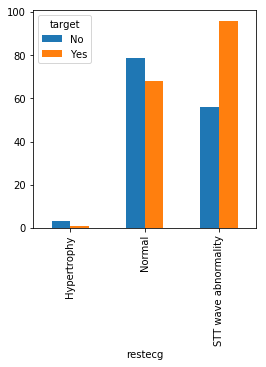

target,No,Yes
restecg,,
Hypertrophy,3,1
Normal,79,68
STT wave abnormality,56,96


In [26]:

heart_data_subset = heart_data[['target','restecg', 'chol']].groupby(['target', 'restecg'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();
heart_data_subset

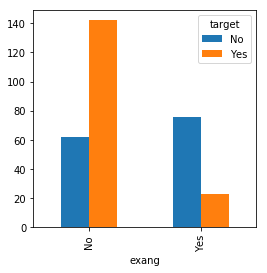

In [27]:
heart_data_subset = heart_data[['target','exang', 'chol']].groupby(['target', 'exang'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();

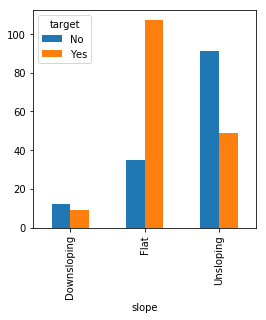

In [28]:

heart_data_subset = heart_data[['target','slope', 'chol']].groupby(['target', 'slope'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();


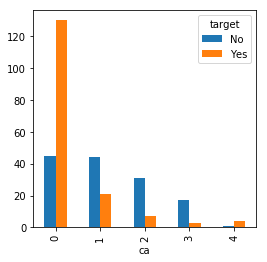

In [29]:
heart_data_subset = heart_data[['target','ca', 'chol']].groupby(['target', 'ca'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();

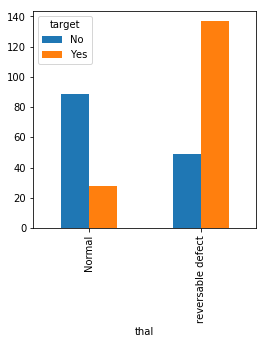

In [33]:

heart_data_subset = heart_data[['target','thal', 'chol']].groupby(['target', 'thal'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();

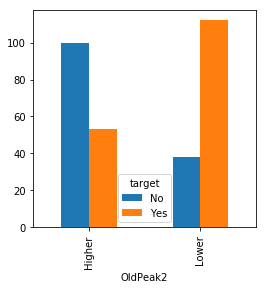

In [46]:
# not sure what this shows
heart_data_subset = heart_data[['target','OldPeak2', 'chol']].groupby(['target', 'OldPeak2'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();


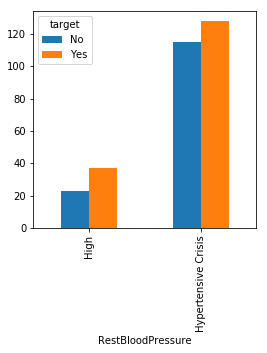

In [35]:

# trestbps too many values
heart_data_subset = heart_data[['target','RestBloodPressure', 'chol']].groupby(['target', 'RestBloodPressure'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();



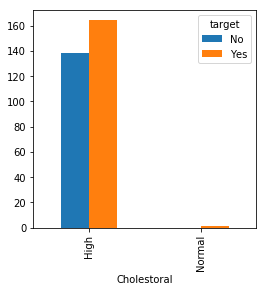

In [37]:
# chol too many values
heart_data_subset = heart_data[['target','Cholestoral', 'chol']].groupby(['target', 'Cholestoral'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();

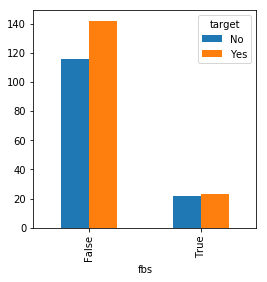

In [38]:
# fbs both higher, not useful
heart_data_subset = heart_data[['target','fbs', 'chol']].groupby(['target', 'fbs'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();

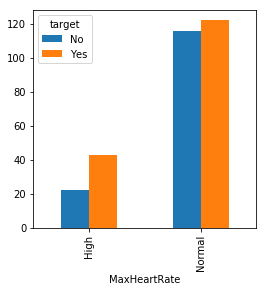

In [39]:
# thalach too many values
heart_data_subset = heart_data[['target','MaxHeartRate', 'chol']].groupby(['target', 'MaxHeartRate'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();

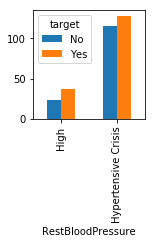

In [59]:
heart_data_subset = heart_data[['target','RestBloodPressure', 'chol']].groupby(['target', 'RestBloodPressure'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(2,2))
plt.show();

age        -0.202463
trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
ca          1.310422
dtype: float64